## NOTES

- I GOT THIS DATASET CALLED PENGUINS.CSV. SO I WANTED TO CREATE A NEURAL NETWORK MODEL OF IT. THE FEATURES ARE SCALED DIFFERENTLY, SO ONE COLUMN DATA IS LARGER THAN OTHERS. PRIOR TO NORMALIZATION, THE MODEL COULD NOT CONVERGE WELL. THE LOSS WAS NOT SO MINIMAL.
- I INITIALLY USED THE NORMALIZATION FUNCTION (F.normalize(p = 2 (L2 norm), dim = 1 (normallize along column axis))), BUT THE LOSS WAS NOT STILL VERY MINIMAL. BUT USING THE MINMAXSCALER CLASS SEEMED TO PRODUCE A BETTER MINIMIZED LOSS

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [23]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 = 10, h2 = 10, out_features = 2):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.out(x))

        return x
    

In [24]:
torch.manual_seed(25)

In [25]:
model = Model()

In [26]:
df = pd.read_csv('penguins.csv')
df = df.drop('island', axis = 1)

In [27]:
df['species'] = df['species'].replace('Adelie', 1.0)
df['species'] = df['species'].replace('Chinstrap', 2.0)
df['species'] = df['species'].replace('Gentoo', 3.0)

df['sex'] = df['sex'].replace('MALE', 1.0)
df['sex'] = df['sex'].replace('FEMALE', 0.0)

In [28]:
X = df.drop('body_mass_g', axis = 1, inplace = True)
X = df.drop('sex', axis = 1)
y = df['sex']

X.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,1.0,39.1,18.7,181
1,1.0,39.5,17.4,186
2,1.0,40.3,18.0,195
3,1.0,36.7,19.3,193
4,1.0,39.3,20.6,190


In [29]:
X = X.values
y = y.values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)



In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
X_train = torch.FloatTensor(X_train)
#X_train = F.normalize(X_train, p = 2, dim = 1)

X_test = torch.FloatTensor(X_test)
#X_test = F.normalize(X_test, p = 2, dim = 1)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [33]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>

In [34]:
#Train the model

epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epochs: {i} and Loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epochs: 0 and Loss: 0.6926823854446411
Epochs: 10 and Loss: 0.6868465542793274
Epochs: 20 and Loss: 0.6715359091758728
Epochs: 30 and Loss: 0.6360664367675781
Epochs: 40 and Loss: 0.5845547914505005
Epochs: 50 and Loss: 0.532543957233429
Epochs: 60 and Loss: 0.49865299463272095
Epochs: 70 and Loss: 0.4826599955558777
Epochs: 80 and Loss: 0.47593069076538086
Epochs: 90 and Loss: 0.4727451205253601


Text(0, 0.5, 'Loss')

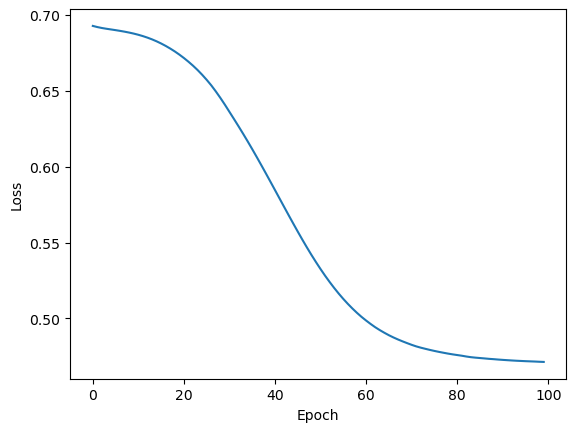

In [35]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [36]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
loss

tensor(0.4910)

In [37]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test): 
        y_val = model.forward(data)
        y_val = (y_val > 0.5).int()

        print(f'{i+1}. {str(y_val)} \t {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'\n We got {correct} right in {len(y_test)} items')

1. tensor([1, 0], dtype=torch.int32) 	 0
2. tensor([1, 0], dtype=torch.int32) 	 0
3. tensor([1, 0], dtype=torch.int32) 	 1
4. tensor([1, 0], dtype=torch.int32) 	 0
5. tensor([0, 1], dtype=torch.int32) 	 1
6. tensor([0, 1], dtype=torch.int32) 	 1
7. tensor([0, 0], dtype=torch.int32) 	 1
8. tensor([1, 0], dtype=torch.int32) 	 0
9. tensor([0, 1], dtype=torch.int32) 	 1
10. tensor([1, 0], dtype=torch.int32) 	 0
11. tensor([1, 0], dtype=torch.int32) 	 1
12. tensor([0, 1], dtype=torch.int32) 	 1
13. tensor([0, 1], dtype=torch.int32) 	 1
14. tensor([1, 0], dtype=torch.int32) 	 0
15. tensor([1, 0], dtype=torch.int32) 	 0
16. tensor([1, 0], dtype=torch.int32) 	 0
17. tensor([0, 1], dtype=torch.int32) 	 1
18. tensor([1, 0], dtype=torch.int32) 	 0
19. tensor([1, 0], dtype=torch.int32) 	 0
20. tensor([1, 0], dtype=torch.int32) 	 0
21. tensor([1, 0], dtype=torch.int32) 	 0
22. tensor([1, 0], dtype=torch.int32) 	 0
23. tensor([1, 0], dtype=torch.int32) 	 0
24. tensor([0, 1], dtype=torch.int32) 	 0
2

In [38]:
new_penguins = torch.tensor([2.0, 50.0, 18.0, 185])
with torch.no_grad():
    y_pred = model.forward(new_penguins)

y_pred

# the prediction below is explained thus: the first and second value represents the the prob of female and the prob of male 
# respectively. it takes that order primmarily because its sequenctial. i indicated that 0 be for female and 1 for male. so 
# its in a sequential order. hence, the prob of being female is 0, while the prob. of being male is 1. thus the prediction is
# that the penguine with the features indicated is male.

tensor([0., 1.])

In [39]:
torch.save(model.state_dict(), 'Samuel_penguins_model.pt')

In [40]:
new_model = Model()
new_model.load_state_dict(torch.load('Samuel_penguins_model.pt'))

<All keys matched successfully>

In [41]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)